## Summary

---

## Imports

In [1]:
import random
from pathlib import Path

import matplotlib as mpl
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from IPython.display import SVG, set_matplotlib_formats

In [2]:
set_matplotlib_formats("svg")

In [3]:
NOTEBOOK_DIR = Path("xx_graphic_abstract")
NOTEBOOK_DIR.mkdir(exist_ok=True)

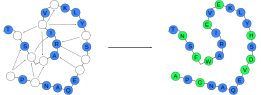

In [4]:
SVG("../docs/images/static/introduction/csps-protein-design.svg")

In [5]:
labels = [
    "A",
    "P",
    "G",
    "N",
    "A",
    "Q",
    "E",
    "V",
    "D",
    "S",
    "H",
    "Y",
    "L",
    "K",
    "E",
    "V",
    "E",
    "I",
    "R",
    "A",
    "W",
    "F",
    "S",
    "N",
    "T"
]
print(len(labels))

25


In [6]:
G = nx.Graph()
G.add_nodes_from(range(25))
assert G.number_of_nodes() == 25

In [7]:
edges_sequential = np.c_[
    list(range(G.number_of_nodes() - 1)), list(range(1, G.number_of_nodes()))
].tolist()
edges_contacts = [
    [22, 0],
    [0, 21],
    [21, 2],
    [2, 20],
    [19, 7],
    [8, 18],
    [10, 18],
    [16, 14],
    [11, 16],
    [16, 20],
    [16, 23],
    [21, 17],
]
G.add_edges_from(edges_sequential)
G.add_edges_from(edges_contacts)

In [8]:
angles = [
    -20,
    -5,
    -20,
    -25,
    -30,
    60,
    60,
    60,
    80,
    100,
    100,
    100,
    160,
    160,
    -150,
    -90,
    -45,
    -70,
    -90,
    -160,
    160,
    110,
    110,
    140,
]
labels = {i: l for i, l in enumerate(labels)}
assert len(angles) == G.number_of_nodes() - 1

In [9]:
starting_pos = [0, 2]
length = 1

positions = [starting_pos]
for angle in angles:
    dx = np.cos(np.deg2rad(angle)) * length
    dy = np.sin(np.deg2rad(angle)) * length
    new_pos = [positions[-1][0] + dx, positions[-1][1] + dy]
    positions.append(new_pos)

In [10]:
color_given = "#3d89ffff"
color_pred = "#1cff56ff"

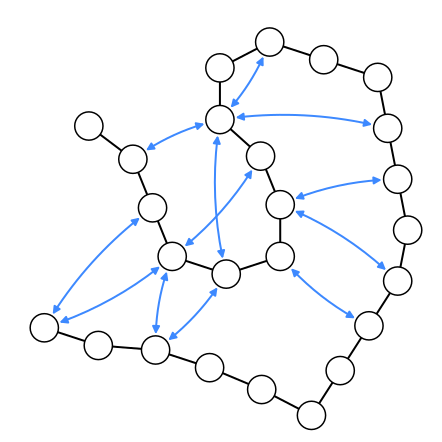

In [11]:
fg, ax = plt.subplots(figsize=(6, 6))
ax.axis("off")
nx.draw_networkx_nodes(
    G,
    pos=positions,
    node_size=800,
    with_labels=True,
    node_color="white",
    edgecolors="k",
    linewidths=1.5,
    ax=ax,
)
nx.draw_networkx_edges(G, pos=positions, edgelist=edges_sequential, width=2)
nx.draw_networkx_edges(
    G.to_directed(),
    pos=positions,
    edgelist=edges_contacts,
    arrowstyle="<|-|>",
    edge_color="#3d89ffff",
    width=2,
    style="dashed",
    linestyle="",
    arrowsize=15,
    node_size=1000,
    min_source_margin=16,
    connectionstyle="arc3,rad=0.1",
)

fg.subplots_adjust(0.005, 0.005, 0.995, 0.995)
fg.savefig(NOTEBOOK_DIR.joinpath("protein-csp-empty.svg"), transparent=True)
fg.savefig(NOTEBOOK_DIR.joinpath("protein-csp-empty.pdf"))
fg.savefig(NOTEBOOK_DIR.joinpath("protein-csp-empty.png"), dpi=300)

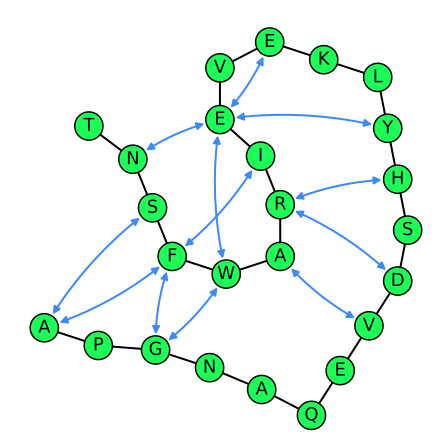

In [12]:
fg, ax = plt.subplots(figsize=(6, 6))
ax.axis("off")
nx.draw_networkx_nodes(
    G,
    pos=positions,
    node_size=800,
    with_labels=True,
    #     node_color="#3d89ffff",
    node_color=color_pred,
    edgecolors="k",
    linewidths=1.5,
    ax=ax,
)
nx.draw_networkx_edges(G, pos=positions, edgelist=edges_sequential, width=2)
nx.draw_networkx_edges(
    G.to_directed(),
    pos=positions,
    edgelist=edges_contacts,
    #     edgelist=edges_contacts + [[e[1], e[0]] for e in edges_contacts],
    arrowstyle="<|-|>",
    edge_color="#3d89ffff",
    width=2,
    style="dashed",
    linestyle="",
    arrowsize=15,
    node_size=1000,
    min_source_margin=16,
    connectionstyle="arc3,rad=0.1",
)
nx.draw_networkx_labels(G, pos=positions, labels=labels, font_size=18, verticalalignment="center")

fg.subplots_adjust(0.005, 0.005, 0.995, 0.995)
fg.savefig(NOTEBOOK_DIR.joinpath("protein-csp-filled.svg"), transparent=True)
fg.savefig(NOTEBOOK_DIR.joinpath("protein-csp-filled.pdf"))
fg.savefig(NOTEBOOK_DIR.joinpath("protein-csp-filled.png"), dpi=300)

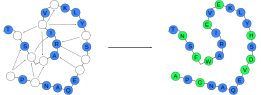

In [13]:
SVG("../docs/images/static/introduction/csps-protein-design.svg")

In [14]:
def draw_networkx_nodes_ellipses(
    G,
    pos,
    nodelist=None,
    node_height=1,
    node_width=2,
    node_angle=0,
    node_color="r",
    node_shape="o",
    alpha=1.0,
    cmap=None,
    vmin=None,
    vmax=None,
    ax=None,
    linewidths=None,
    label=None,
    **kwargs
):
    """Draw the nodes of the graph G.

    This draws only the nodes of the graph G.

    Parameters
    ----------
    G : graph
       A networkx graph

    pos : dictionary
       A dictionary with nodes as keys and positions as values.
       Positions should be sequences of length 2.

    ax : Matplotlib Axes object, optional
       Draw the graph in the specified Matplotlib axes.

    nodelist : list, optional
       Draw only specified nodes (default G.nodes())

    node_height : scalar or array
       Height of ellipse nodes (default=300).  If an array is specified it must be the
       same length as nodelist.
       
    node_width : scalar or array
       Width of ellipse nodes (default=300).  If an array is specified it must be the
       same length as nodelist.
       
    node_width : scalar or array
       Angle of major axis of ellipse nodes (default=300).  If an array is specified it must be the
       same length as nodelist.
       
    node_color : color string, or array of floats
       Node color. Can be a single color format string (default='r'),
       or a  sequence of colors with the same length as nodelist.
       If numeric values are specified they will be mapped to
       colors using the cmap and vmin,vmax parameters.  See
       matplotlib.scatter for more details.

    node_shape :  string
       The shape of the node.  Specification is as matplotlib.scatter
       marker, one of 'so^>v<dph8' (default='o').

    alpha : float
       The node transparency (default=1.0)

    cmap : Matplotlib colormap
       Colormap for mapping intensities of nodes (default=None)

    vmin,vmax : floats
       Minimum and maximum for node colormap scaling (default=None)

    linewidths : [None | scalar | sequence]
       Line width of symbol border (default =1.0)

    label : [None| string]
       Label for legend

    Returns
    -------
    matplotlib.collections.EllipseCollection
        `EllipseCollection` of the nodes.
    """

    import collections

    try:
        import numpy
        import matplotlib.pyplot as plt
        import matplotlib as mpl

    except ImportError:
        raise ImportError("Matplotlib required for draw()")
    except RuntimeError:
        print("Matplotlib unable to open display")
        raise

    if ax is None:
        ax = plt.gca()

    if nodelist is None:
        nodelist = list(G)

    if not nodelist or len(nodelist) == 0:  # empty nodelist, no drawing
        return None

    try:
        xy = numpy.asarray([pos[v] for v in nodelist])
    except KeyError as e:
        raise nx.NetworkXError("Node %s has no position." % e)
    except ValueError:
        raise nx.NetworkXError("Bad value in node positions.")

    if isinstance(alpha, collections.Iterable):
        node_color = apply_alpha(node_color, alpha, nodelist, cmap, vmin, vmax)
        alpha = None

    if cmap is not None:
        cm = mpl.cm.get_cmap(cmap)
        norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    else:
        cm = None
        norm = None

    node_collection = mpl.collections.EllipseCollection(
        widths=node_width,
        heights=node_height,
        angles=-45,
        offsets=np.array(xy),
        cmap=cm,
        norm=norm,
        transOffset=ax.transData,
        linewidths=linewidths,
        **kwargs,
    )

#     node_collection.set_color(node_color)
    node_collection.set_label(label)
    node_collection.set_zorder(1)
    ax.add_collection(node_collection)

    return node_collection

In [15]:
angle = np.pi / 6
angle

0.5235987755982988

In [19]:
cmap = plt.get_cmap('tab20b<')

ValueError: 'tab20b<' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

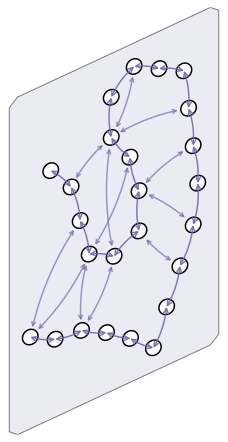

In [35]:
def standardize(a):
    a = a - a.min()
    a = a / (a.max() - a.min())
    return a


def add_padding(a, padding):
    range_ = a.max() - a.min()
    a = padding + a / range_ * (range_ - padding * 2)
    return a


def adjust_y_corrd(x, y, angle):
    return y + x / np.cos(angle) * np.sin(angle)


def adjust_pos(pos, scalex, padding):
    x = np.array([v[0] for v in pos.values()])
    y = np.array([v[1] for v in pos.values()])
    # Put x and y in the 0 to 1 range
    x = standardize(x)
    y = standardize(y)
    #
    x = add_padding(x, padding[0])
    y = add_padding(y, padding[1])
    #
    x *= scalex
    #
    y = adjust_y_corrd(x, y, angle)
    #
    pos = {k: np.array([x[i], y[i]]) for i, k in enumerate(pos)}
    return pos


def add_hex_edges(x, y, eps):
    x_new = [x[0], x[1], x[1] + eps, x[2] - eps, x[2], x[3], x[3] - eps, x[0] + eps]
    y_new = [y[0] + eps, y[1] - eps, y[1], y[2], y[2] - eps, y[3] + eps, y[3], y[0]]
    return np.array(x_new), np.array(y_new)


cmap = plt.cm.get_cmap("tab20c")

scalex = 0.5
node_size = 125
eps = 0.02

x = np.array([0.0, 0.0, 1.0, 1.0]) * scalex
y = np.array([0.0, 1.0, 1.0, 0.0])
x, y = add_hex_edges(x, y, eps=eps)
y = adjust_y_corrd(x, y, angle)

pos = np.array(positions)
pos = pos - pos.min()
node_size = node_size / (pos.max() - pos.min())
pos = pos / (pos.max() - pos.min())
pos = {i: pos[i] for i in range(len(pos))}
pos = adjust_pos(pos, x.max(), padding=(0.1, 0.07))

fg, ax = plt.subplots(figsize=(3, 6))

ax.add_patch(
    patches.Polygon(
        xy=list(zip(x, y)),
        fill=True,
        alpha=0.5,
        linewidth=1,
                facecolor=cmap(15),
#         facecolor="lightgrey",
        edgecolor="k",
        joinstyle="round",
        zorder=0,
    )
)
draw_networkx_nodes_ellipses(
    G,
    pos,
    cmap=cmap,
    node_width=node_size * np.cos(angle),
    node_height=node_size,
    facecolors="white",
    edgecolors="black",
    linewidths=1.5,
    ax=ax,
)
# edges = nx.draw_networkx_edges(
#     G.to_directed(),
#     pos=pos,
#     edgelist=list(G.edges()),
#     arrowstyle="<->",
#     width=1,
#     style="--",
#     linestyle="--",
#     arrowsize=10,
#     node_size=200,
#     min_source_margin=7,
#     ax=ax,
# )
# nx.draw_networkx_edges(G, pos=pos, edgelist=edges_sequential, width=2)
nx.draw_networkx_edges(
    G.to_directed(),
    pos=pos,
    edgelist=edges_sequential,
    #     edgelist=edges_contacts + [[e[1], e[0]] for e in edges_contacts],
    arrowstyle="<->",
#     edge_color="k",
    edge_color=cmap(12),
    width=1.5,
    arrowsize=12,
    node_size=0,
    min_source_margin=0,
    connectionstyle="arc3,rad=0.1",
    alpha=0.9,
    zorder=999,
)
nx.draw_networkx_edges(
    G.to_directed(),
    pos=pos,
    edgelist=edges_contacts,
    #     edgelist=edges_contacts + [[e[1], e[0]] for e in edges_contacts],
    arrowstyle="<->",
#     edge_color="k",
    edge_color=cmap(12),
    width=1.5,
    arrowsize=9,
    node_size=400,
    min_source_margin=11,
    connectionstyle="arc3,rad=0.1",
    alpha=0.7,
    zorder=999,
)


# offset = 0.55
# x += offset
# pos = {k: np.array([v[0] + offset, v[1]]) for k, v in pos.items()}

# for loc in pos.values():
#     ax.arrow(loc[0] - 0.05, loc[1], 0.01, 0, width=0.005, alpha=0.5, zorder=3, fill=False)
# #     center_y = adjust_y_corrd(center_x, 0, angle)
# #     ax.arrow(0.3, center_y, 0.2, 0, width=0.02, alpha=0.5, zorder=3, fill=False)


# ax.add_patch(
#     patches.Polygon(
#         xy=list(zip(x, y)), fill=True, alpha=0.5, linewidth=1, facecolor=cmap(3), edgecolor="k",
#     )
# )
# draw_networkx_nodes_ellipses(
#     G,
#     pos,
#     cmap=cmap,
#     node_color=cmap(0),
#     node_width=node_size * np.cos(angle),
#     node_height=node_size,
#     ax=ax,
# )
# # edges = nx.draw_networkx_edges(
# #     G.to_directed(),
# #     pos=pos,
# #     edgelist=list(G.edges()),
# #     arrowstyle="<->",
# #     width=1,
# #     style="--",
# #     linestyle="--",
# #     arrowsize=10,
# #     node_size=200,
# #     min_source_margin=7,
# #     ax=ax,
# # )
# nx.draw_networkx_edges(G, pos=positions, edgelist=edges_sequential, width=2)
# out = nx.draw_networkx_edges(
#     G.to_directed(),
#     pos=positions,
#     edgelist=edges_contacts,
#     #     edgelist=edges_contacts + [[e[1], e[0]] for e in edges_contacts],
#     arrowstyle="<|-|>",
#     edge_color="#3d89ffff",
#     width=2,
#     style="dashed",
#     linestyle="",
#     arrowsize=15,
#     node_size=1000,
#     min_source_margin=16,
#     connectionstyle="arc3,rad=0.1",
# )

ax.set_xlim(-0.005, 0.505)
ax.set_ylim(y.min(), y.max())
ax.axis("off")

fg.subplots_adjust(0.005, 0.005, 0.995, 0.995)
fg.savefig(NOTEBOOK_DIR.joinpath("graph-conv-layer.svg"), transparent=True)
fg.savefig(NOTEBOOK_DIR.joinpath("graph-conv-layer.pdf"))
fg.savefig(NOTEBOOK_DIR.joinpath("graph-conv-layer.png"), dpi=300)

In [17]:
cmap(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [18]:
pos = np.array(positions)
pos = pos - pos.min()
pos = pos / (pos.max() - pos.min())
p

NameError: name 'p' is not defined